# SIBINRAJ V M

## IRIS FLOWER CLASSIFICATION

IMPORT NECESSARY LIBARIES 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
#READING THE DATASET
data=pd.read_csv(r'D:\internship\Iris.csv')

# EDA

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
data.shape

(150, 6)

In [8]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Get the number of null or missing values in the data


In [11]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

 Get the total number of duplicated entries in the data


In [13]:
data.duplicated().sum() 

0

From the basic exploratory analysis in this dataframe, there are no null values or duplicated entries in the data

Dropping irrelevant columns 

In [14]:
data.drop('Id', axis=1, inplace=True)

Since the column 'Id' is not relevant to the task at hand, it is dropped from the dataframe.

In [16]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
#splitting the datframe into numerical and categorical 
num_data=list(data.columns.drop(['Species']))
cat_data=['Species']

Remove outliers

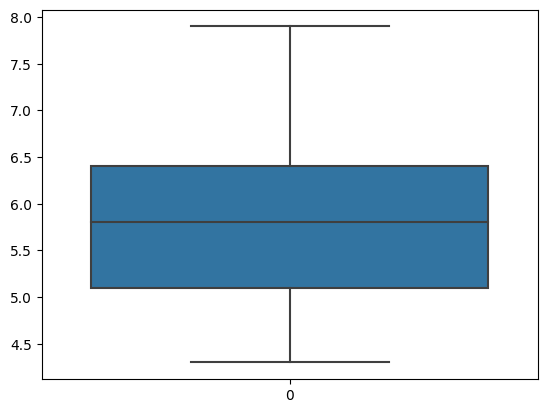

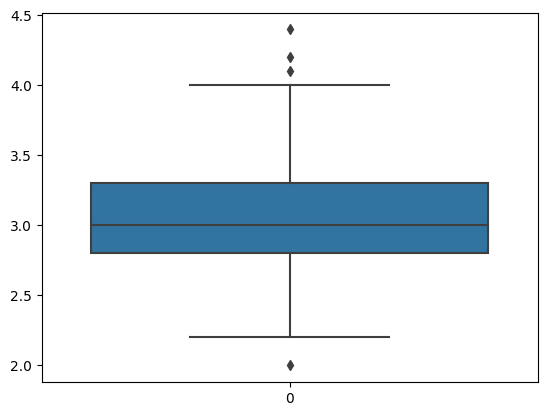

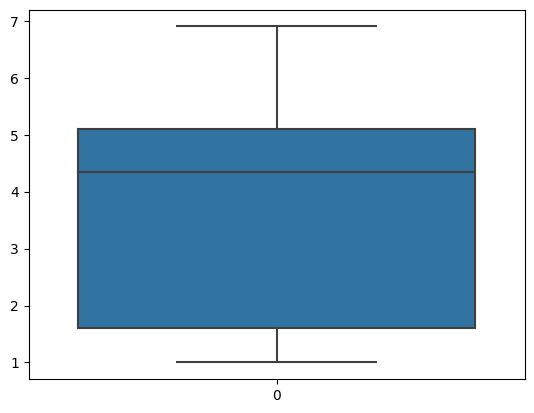

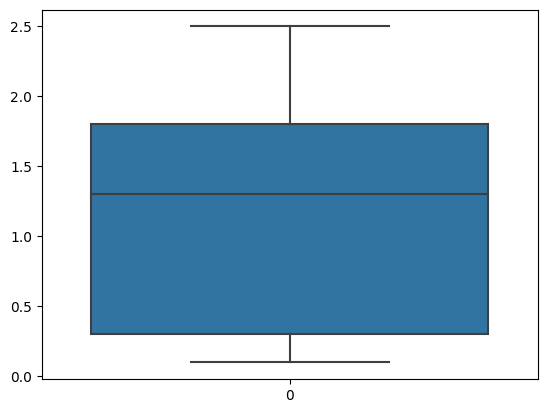

In [18]:
for i in num_data:
    sns.boxplot(data=data[i])
    plt.show()

In [19]:
for i in num_data:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)

    IQR = Q3-Q1
    low = Q1-1.5*IQR
    up = Q3+1.5*IQR

    for j in data[i]:
        if j<low:
            data=data.replace(j, low)
        if j>up:
            data=data.replace(j, up)

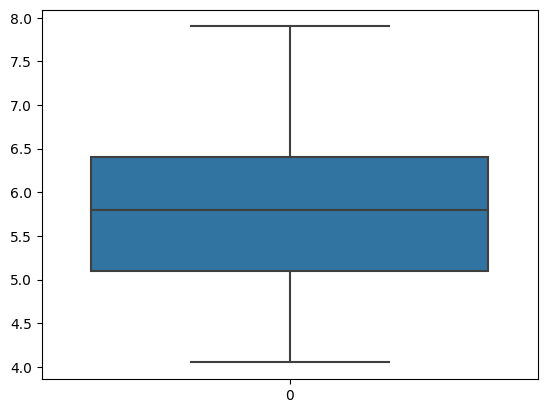

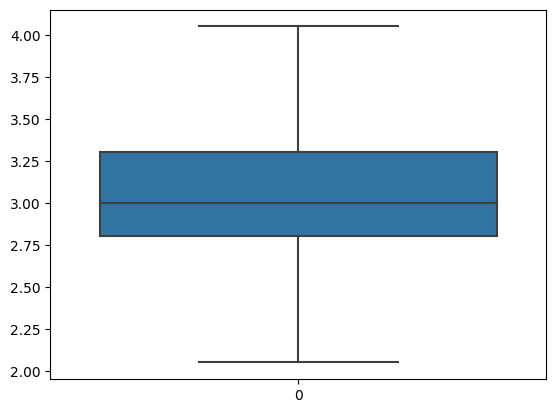

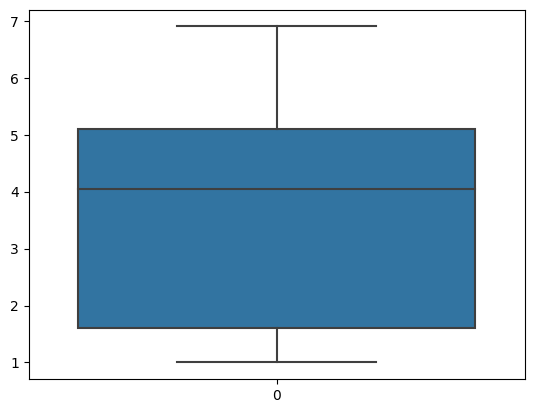

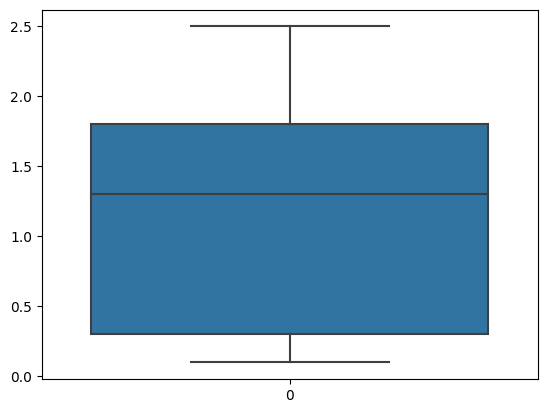

In [21]:
for i in num_data:
    sns.boxplot(data=data[i])
    plt.show()

### Data Visualization

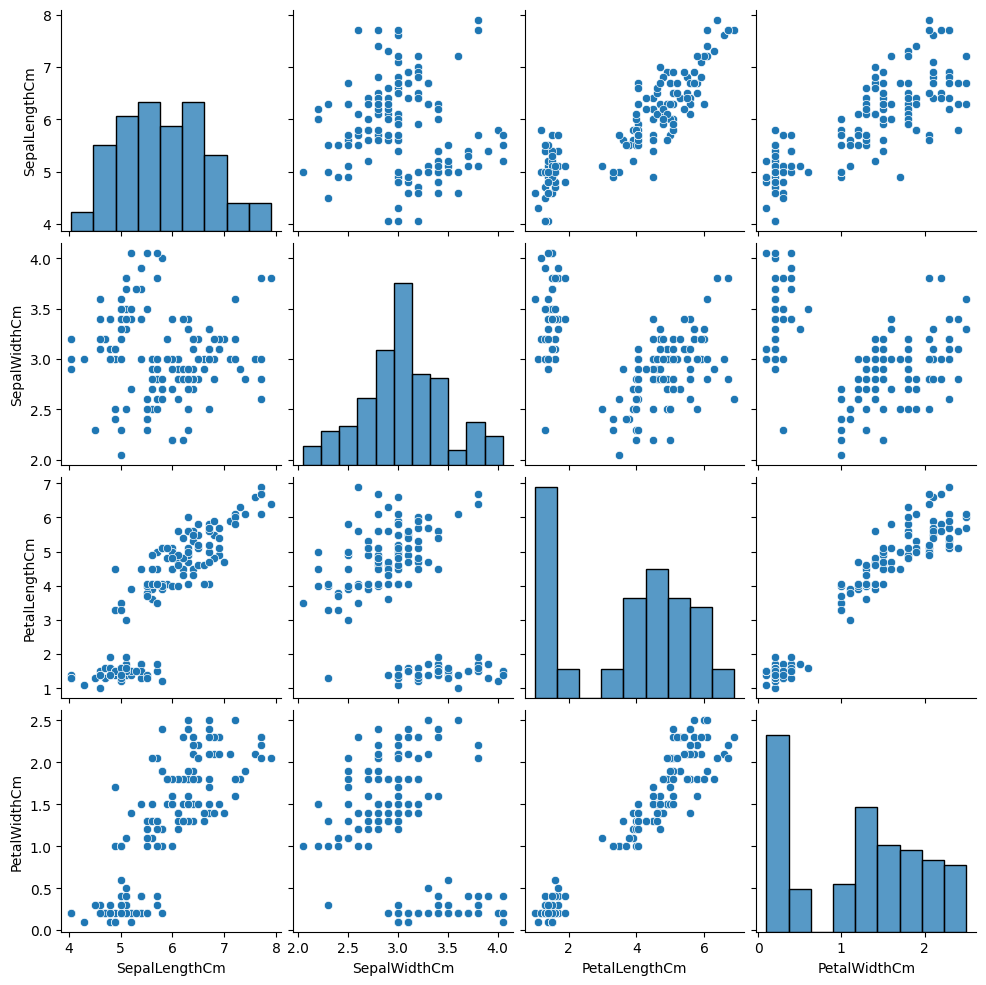

In [22]:
sns.pairplot(data=data)
plt.show()

A pairplot gives a pictorial representation of the entire dataset by plotting graphs between all columns. It shows how every column is related to the other.

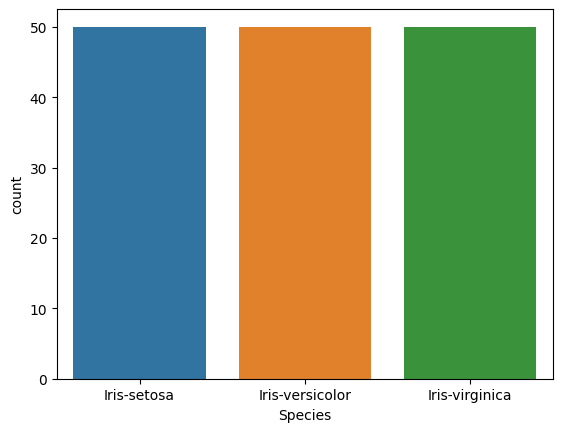

In [23]:
sns.countplot(data=data, x='Species')
plt.show()

The countplot gives us the count of flowers belonging to each species which seems to be equal, i.e. 50 each.

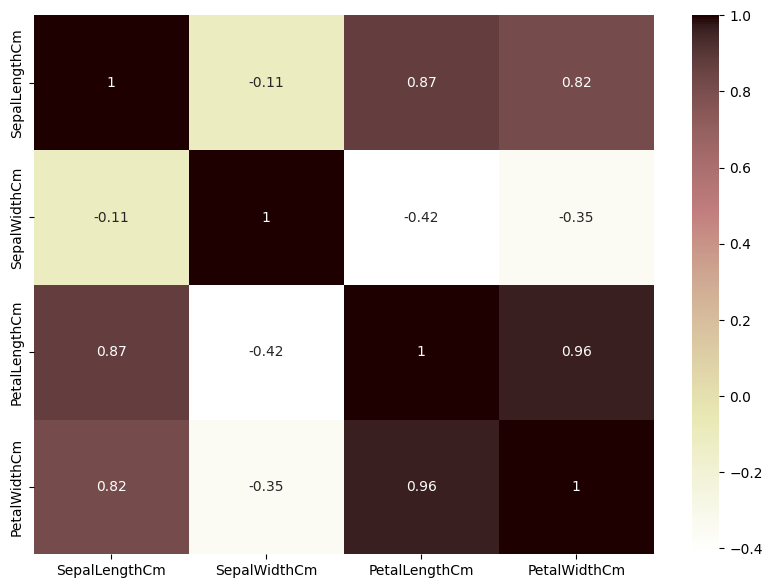

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(data=data.corr(), annot=True, cmap='pink_r')
plt.show()

The heatmap depicts the relationship between each attribute pair.
* Petal Length is significantly correlated with Sepal Length and Petal Width, which means that when Sepal Length or Petal Width grows, so does Petal Length.
* Sepal Length is also closely correlated with Petal Width.

* Sepal Width has a negative association with all other qualities of varied intensities. This indicates that when the value of the other qualities increases, the value of Sepal Width lowers and vice versa.

### Encoding the target column

In [25]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Species'] = encoder.fit_transform(data['Species'])
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.20,0
1,4.9,3.0,1.4,0.20,0
2,4.7,3.2,1.3,0.20,0
3,4.6,3.1,1.5,0.20,0
4,5.0,3.6,1.4,0.20,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.30,2
146,6.3,2.5,5.0,1.90,2
147,6.5,3.0,5.2,2.05,2
148,6.2,3.4,5.4,2.30,2


## Building Model

In [65]:
# Splitting the dataset

from sklearn.model_selection import train_test_split

x = data.drop(['Species'], axis=1)
y = data['Species']

X_train,X_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.2)


In [66]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [67]:
X_test.shape, y_test.shape

((30, 4), (30,))

In [59]:
# Building and fitting the model

from sklearn.linear_model import LogisticRegression

model1=LogisticRegression()
model1.fit(X_train, y_train)

y_pred=model1.predict(X_test)

### Evaluating the performance of the model

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy =", accuracy_score(y_test, y_pred))
print('-----------------------------------------------------\n')
print('Classification Report:\n\n', classification_report(y_test, y_pred))
print('-----------------------------------------------------\n')
print('Confusion Matrix:\n\n', confusion_matrix(y_test, y_pred))

Accuracy = 1.0
-----------------------------------------------------

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

-----------------------------------------------------

Confusion Matrix:

 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [61]:
from sklearn.ensemble import RandomForestClassifier

model2=RandomForestClassifier()
model2.fit(X_train, y_train)

y_pred=model2.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy =", accuracy_score(y_test, y_pred))
print('-----------------------------------------------------\n')
print('Classification Report:\n\n', classification_report(y_test, y_pred))
print('-----------------------------------------------------\n')
print('Confusion Matrix:\n\n', confusion_matrix(y_test, y_pred))

Accuracy = 1.0
-----------------------------------------------------

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

-----------------------------------------------------

Confusion Matrix:

 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [63]:
from sklearn.tree import DecisionTreeClassifier

model3=DecisionTreeClassifier()
model3.fit(X_train, y_train)

y_pred=model3.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy =", accuracy_score(y_test, y_pred))
print('-----------------------------------------------------\n')
print('Classification Report:\n\n', classification_report(y_test, y_pred))
print('-----------------------------------------------------\n')
print('Confusion Matrix:\n\n', confusion_matrix(y_test, y_pred))


Accuracy = 1.0
-----------------------------------------------------

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

-----------------------------------------------------

Confusion Matrix:

 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


* Most of the model has an accuracy of 1%
* 
* The precision, recall and f1-score of each species can be identified from the classification report.
* The exact number of flowers correctly and incorrectly classified into each species can be obtained from the confusion matrix.

## SAVING THE MODEL 

In [68]:
import pickle

saved = pickle.dumps(model2)
pickled_model = pickle.loads(saved)
pickled_model.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

### Prediction on unknown data

In [69]:
species_mapping = {0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}

prediction=model.predict([[6.3, 3.2, 4.6, 1.4]])

species_mapping[prediction[0]]

'Iris-versicolor'